# Google Play Store Apps

Web scraped data of 10k Play Store apps for analysing the Android market.

Dataset: https://www.kaggle.com/lava18/google-play-store-apps

Author: https://github.com/mohammedmahdiali

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Let's read the data

In [2]:
data = pd.read_csv('../data/googleplaystore.csv')
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Rename the column names

In [4]:
data.columns = [col.replace(' ', '_').lower() for col in data.columns]
data.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

#### Fix numerical data

In [5]:
'''
First you need check values with:

for i in data[col_name].unique():
    print(i)

'''

# reviews
data['reviews'] = pd.to_numeric(data['reviews'], errors='coerce')

# size
def mb_to_kb(size):
    if size.endswith('M'):
        return float(size.replace('M', '')) * 1000
    elif size.endswith('k'):
        return float(size.replace('k', ''))
    elif size.endswith('+'):
        return float(size.replace('+', '').replace(',', ''))
    else:
        return np.nan

data['size'] = data['size'].apply(mb_to_kb)

# price
data['price'] = data['price'].apply(lambda x: x.replace('$', ''))
data['price'] = pd.to_numeric(data['price'], errors='coerce')

data.dtypes

app                object
category           object
rating            float64
reviews           float64
size              float64
installs           object
type               object
price             float64
content_rating     object
genres             object
last_updated       object
current_ver        object
android_ver        object
dtype: object

In [6]:
data.describe() # max(rating) = 19 ?

,rating,reviews,size,price
count,9367.000000,1.084000e+04,9146.00000,10840.000000
mean,4.193338,4.441529e+05,21514.28630,1.027368
std,0.537431,2.927761e+06,22588.53162,15.949703
min,1.000000,0.000000e+00,8.50000,0.000000
25%,4.000000,3.800000e+01,4900.00000,0.000000
50%,4.300000,2.094000e+03,13000.00000,0.000000
75%,4.500000,5.477550e+04,30000.00000,0.000000
max,19.000000,7.815831e+07,100000.00000,400.000000


In [7]:
data[data['rating']>5]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,1000.0,Free,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
data = data[data['rating'] <= 5]

In [9]:
data.describe() # Now max(rating) = 5 OK

,rating,reviews,size,price
count,9366.000000,9.366000e+03,7729.000000,9366.000000
mean,4.191757,5.140498e+05,22957.606870,0.960928
std,0.515219,3.144042e+06,23445.491095,15.816585
min,1.000000,1.000000e+00,8.500000,0.000000
25%,4.000000,1.862500e+02,5300.000000,0.000000
50%,4.300000,5.930500e+03,14000.000000,0.000000
75%,4.500000,8.153275e+04,33000.000000,0.000000
max,5.000000,7.815831e+07,100000.000000,400.000000


#### Fix categorical data

In [10]:
data.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
'''
First you need check values with:

data[col_name].value_counts()

'''

data['app'] = data['app'].apply(lambda x: x.lower())
data['category'] = data['category'].apply(lambda x: x.lower())
data['type'] = data['type'].apply(lambda x: x.lower())
data['content_rating'] = data['content_rating'].apply(lambda x: x.lower())

to_drop = ['genres', 'last_updated', 'current_ver']
data.drop(columns=to_drop, axis=1, inplace=True)

#### Add new column

In [12]:
data['working_on_ver_4'] = data['android_ver'].apply(lambda v: 'yes' if str(v).startswith('4') else 'no')
data.drop(columns='android_ver', axis=1, inplace=True)
data.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,working_on_ver_4
0,photo editor & candy camera & grid & scrapbook,art_and_design,4.1,159.0,19000.0,"10,000+",free,0.0,everyone,yes
1,coloring book moana,art_and_design,3.9,967.0,14000.0,"500,000+",free,0.0,everyone,yes
2,"u launcher lite – free live cool themes, hide ...",art_and_design,4.7,87510.0,8700.0,"5,000,000+",free,0.0,everyone,yes
3,sketch - draw & paint,art_and_design,4.5,215644.0,25000.0,"50,000,000+",free,0.0,teen,yes
4,pixel draw - number art coloring book,art_and_design,4.3,967.0,2800.0,"100,000+",free,0.0,everyone,yes


#### Check missing values

In [13]:
data.isna().sum()

app                    0
category               0
rating                 0
reviews                0
size                1637
installs               0
type                   0
price                  0
content_rating         0
working_on_ver_4       0
dtype: int64

In [14]:
(data.isna().sum() / data.shape[0]) * 100 # With %

app                  0.000000
category             0.000000
rating               0.000000
reviews              0.000000
size                17.478112
installs             0.000000
type                 0.000000
price                0.000000
content_rating       0.000000
working_on_ver_4     0.000000
dtype: float64

In [15]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
data['size'] = imputer.fit_transform(data[['size']])

In [16]:
(data.isna().sum() / data.shape[0]) * 100 # With %

app                 0.0
category            0.0
rating              0.0
reviews             0.0
size                0.0
installs            0.0
type                0.0
price               0.0
content_rating      0.0
working_on_ver_4    0.0
dtype: float64

#### Check outliers

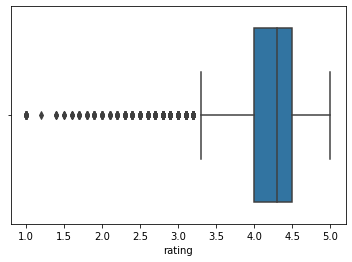

In [17]:
sns.boxplot(x='rating', data=data);

In [18]:
from datasist.structdata import detect_outliers

idx = detect_outliers(data, 0, ['rating', 'reviews', 'size', 'price'])
idx[:10]

[15, 87, 209, 311, 312, 477, 492, 514, 518, 520]

In [19]:
outliers = data.loc[idx]
clean = data.drop(idx, axis=0)

#### What is the most expensive app on the store?

In [20]:
data[data['price'] == data['price'].max()]

,app,category,rating,reviews,size,installs,type,price,content_rating,working_on_ver_4
4367,i'm rich - trump edition,lifestyle,3.6,275.0,7300.0,"10,000+",paid,400.0,everyone,yes


#### Which genre has more apps?

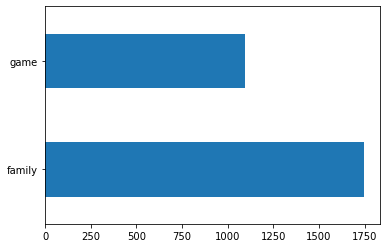

In [21]:
data['category'].value_counts()[:2].plot(kind='barh'); # family

#### What is the average size of the free & paid apps?

In [22]:
data.groupby('type').mean()['size']

type
free    23112.734451
paid    20867.100877
Name: size, dtype: float64

#### What is the 5 top expensive apps that has rate of 5?

In [23]:
data[data['rating'] == 5].sort_values(by='price', ascending=False)[:5]

,app,category,rating,reviews,size,installs,type,price,content_rating,working_on_ver_4
5489,ap art history flashcards,family,5.0,1.0,96000.0,10+,paid,29.99,mature 17+,yes
7477,usmle step 2 ck flashcards,family,5.0,1.0,40000.0,10+,paid,19.99,everyone,no
5246,hey aj! it's bedtime!,family,5.0,1.0,63000.0,10+,paid,4.99,everyone,no
7204,ti-84 ce graphing calculator manual ti 84,family,5.0,1.0,27000.0,100+,paid,4.99,everyone,yes
5482,mestudying: ap english lit,family,5.0,1.0,655.0,10+,paid,4.99,everyone,no


#### How many apps that has more than 50K reviews?

In [24]:
data[data['reviews'] > 50000].shape[0]

2782

#### What is the average price of the apps for each genre with each installs numbers?

In [25]:
data.groupby(['category', 'installs']).mean() # Access with .loc['art_and_design']

rating       reviews          size     price
category       installs                                                   
art_and_design 1,000+       4.366667  6.000000e+01   3866.666667  0.663333
               1,000,000+   4.325000  1.831850e+04  25500.000000  0.000000
               10,000+      4.445455  2.397273e+02   9836.363636  0.180909
               10,000,000+  4.460000  2.068434e+05  24183.042748  0.000000
               100+         5.000000  1.000000e+00   2900.000000  0.000000
...                              ...           ...           ...       ...
weather        5,000,000+   4.112500  7.579175e+04  25366.303435  0.000000
               50,000+      4.500000  3.252000e+03   3800.000000  0.000000
               50,000,000+  4.420000  1.891730e+06  20566.085496  0.000000
               500+         3.800000  1.100000e+01   2900.000000  1.990000
               500,000+     4.428571  2.278357e+04  11651.086696  0.855714

[448 rows x 4 columns]

#### How many apps have rating > 4.7 ans what is thier avg. price?

In [26]:
data[data['rating'] > 4.7].mean()['price']

0.5018487394957988

#### How much google earned from the 5,000,000+ installed apps?

In [27]:
data[data['installs'] == '5,000,000+']['price'].sum()

0.0

#### What is the max and min size for free & paid apps?

In [28]:
data.groupby('type').describe()['size']

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
free,8719.0,23112.734451,21279.437059,8.5,6900.0,21000.0,27000.0,100000.0
paid,647.0,20867.100877,21454.062286,14.0,3800.0,16000.0,27000.0,100000.0


#### Is there correlation between rating, reviews, size with the price of the app?

In [29]:
data.corr()['price']

rating    -0.021903
reviews   -0.009820
size      -0.026224
price      1.000000
Name: price, dtype: float64

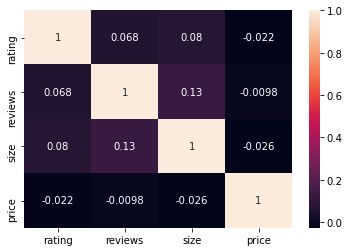

In [30]:
sns.heatmap(data.corr(), annot=True);

#### How many apps for each type for each content rating?

In [31]:
data.groupby(['type', 'content_rating']).count()['app']

type  content_rating 
free  adults only 18+       3
      everyone           6868
      everyone 10+        364
      mature 17+          444
      teen               1039
      unrated               1
paid  everyone            552
      everyone 10+         33
      mature 17+           17
      teen                 45
Name: app, dtype: int64

#### How many apps that can workin android version 4?

In [32]:
data[data['working_on_ver_4'] == 'yes'].shape[0]

5859

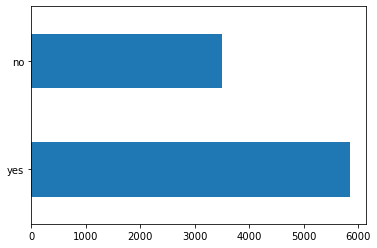

In [33]:
data['working_on_ver_4'].value_counts().plot(kind='barh');